<a href="https://colab.research.google.com/github/thurarchive/Dicoding_Data_Analysis_Project/blob/main/Dicoding_Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis Project: Bike Sharing Dataset
- **Name:** Fajri Fathur Rahman
- **Email:** fajri.f.rahman@gmail.com
- **Dicoding ID:** fajrifathur

## Defining the Business Question

*  **Question 1:** How do weather factors (temperature, humidity, wind speed) and seasons affect the daily number of bike rentals, and is there a significant difference between 2011 and 2012?



* **Question 2:** How do bike usage patterns differ between casual and registered users, and how does this change on holidays compared to working days?

## Setup workspace

In [1]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
from google.colab import drive
from google.colab import files

drive.mount('/content/gdrive')
files.upload()

In [3]:
!ls -lha kaggle.json

-rw-r--r-- 1 root root 73 Aug 17 09:14 kaggle.json


In [4]:
!pwd

/content


In [5]:
import os
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d lakshmi25npathi/bike-sharing-dataset
!unzip bike-sharing-dataset.zip

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset
License(s): unknown
  0% 0.00/286k [00:00<?, ?B/s]
100% 286k/286k [00:00<00:00, 30.9MB/s]
Archive:  bike-sharing-dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


## Import All Packages/Libraries Used


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

## Data Wrangling

### Gathering Data

In [7]:
with open('Readme.txt', 'r') as f:
  readme_content = f.read()
print(readme_content)

Bike Sharing Dataset

Hadi Fanaee-T

Laboratory of Artificial Intelligence and Decision Support (LIAAD), University of Porto
INESC Porto, Campus da FEUP
Rua Dr. Roberto Frias, 378
4200 - 465 Porto, Portugal


Background 

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration
of tra

In [8]:
day = pd.read_csv('day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [9]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [10]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

In [11]:
# Check for duplicates and missing values

print("duplicates: ", day.duplicated().sum())
print("missing values: ", day.isna().sum().sum())

duplicates:  0
missing values:  0


There's no duplicates, null, whatsoever so there's no need to perform data cleaning I suppose

## Exploratory Data Analysis (EDA)

### Explore Weather and Seasonal Effects

In [12]:
day.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [13]:
# Convert 'dteday' to datetime
day['dteday'] = pd.to_datetime(day['dteday'])

# Create a year column
day['year'] = day['yr'].map({0: 2011, 1: 2012})

# Create a 'season' column with actual names
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day['season_name'] = day['season'].map(season_map)

# Create a 'weather' column with descriptive names
weather_map = {1: 'Clear', 2: 'Mist', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'}
day['weather_desc'] = day['weathersit'].map(weather_map)

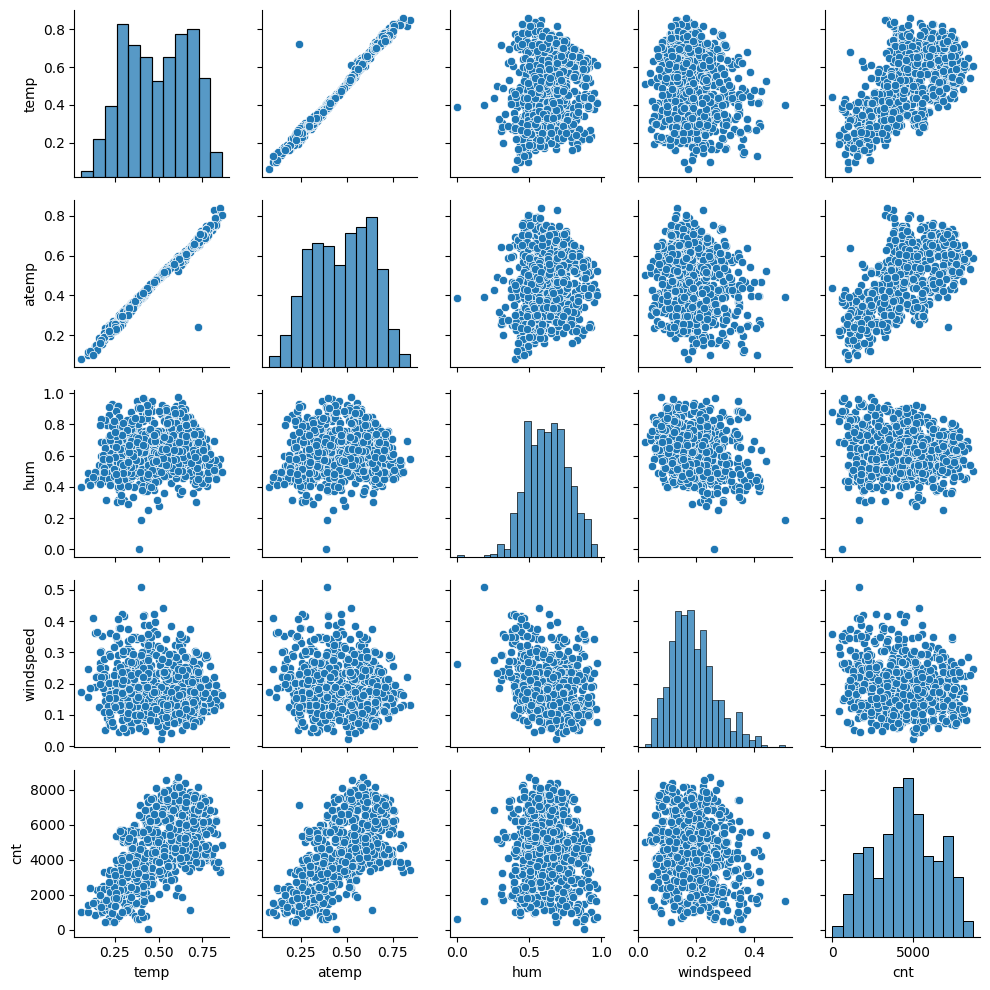

In [14]:
# Scatter plot matrix of weather factors vs total rentals
sns.pairplot(day[['temp', 'atemp', 'hum', 'windspeed', 'cnt']], height=2)
plt.tight_layout()
plt.show()

### Explore User Type Patterns


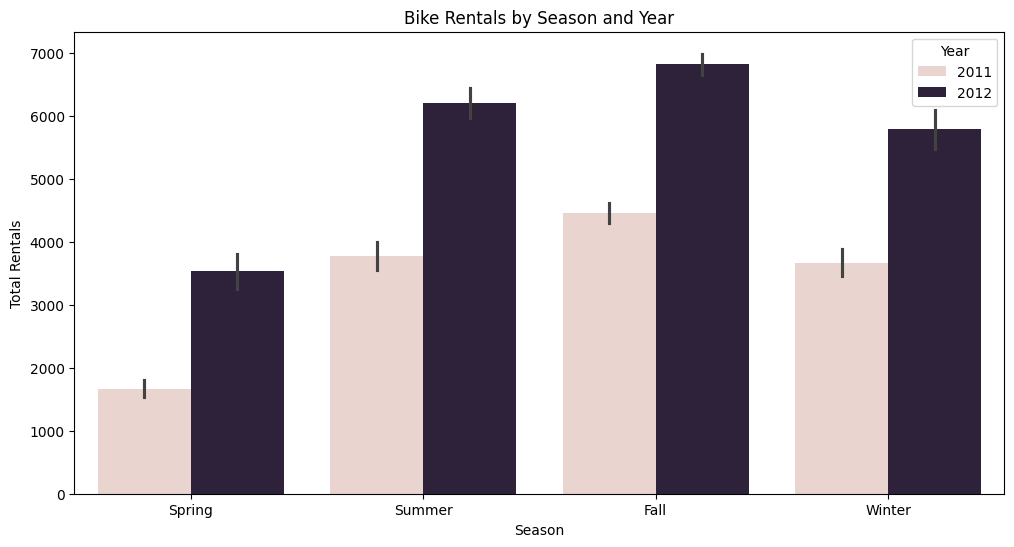

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(x='season_name', y='cnt', hue='year', data=day)
plt.title('Bike Rentals by Season and Year')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.legend(title='Year')
plt.show()

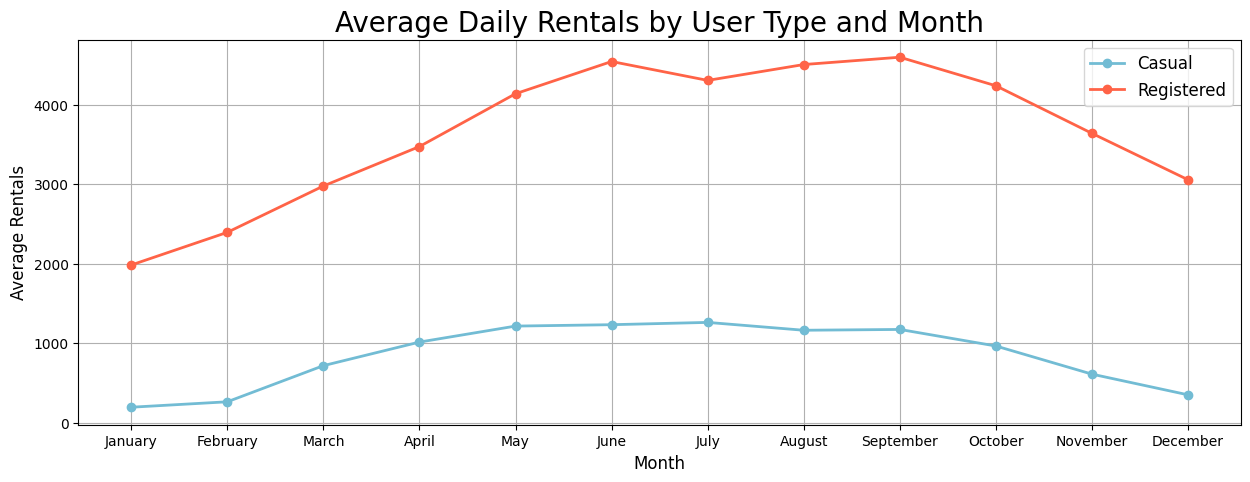

In [16]:
# Stacked bar plot of casual vs registered users by month
day['month'] = day['mnth'].map({
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
})

monthly_users = day.groupby('month')[['casual', 'registered']].mean()
monthly_users = monthly_users.reindex(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])

plt.figure(figsize=(15, 5))

plt.plot(
    monthly_users.index,
    monthly_users["casual"],
    marker='o',
    linewidth=2,
    color="#72BCD4",
    label="Casual"
)

# Plot for Registered Users
plt.plot(
    monthly_users.index,
    monthly_users["registered"],
    marker='o',
    linewidth=2,
    color="#FF6347",  # Tomato color for contrast
    label="Registered"
)

plt.title("Average Daily Rentals by User Type and Month", loc="center", fontsize=20)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Rentals", fontsize=12)
plt.xticks(monthly_users.index, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

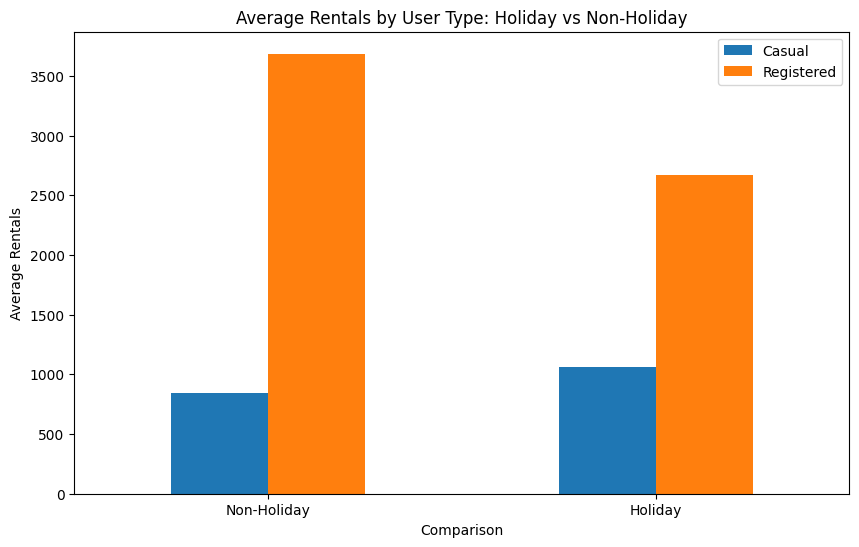

In [17]:
# Comparison of user types on holidays vs working days
holiday_comparison = day.groupby('holiday')[['casual', 'registered']].mean()
holiday_comparison.plot(kind='bar', figsize=(10, 6))
plt.title('Average Rentals by User Type: Holiday vs Non-Holiday')
plt.xlabel('Comparison')
plt.ylabel('Average Rentals')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'], rotation=0)
plt.legend(['Casual', 'Registered'])
plt.show()

## Visualization & Explanatory Analysis

### Question 1: How do weather factors (temperature, humidity, wind speed) and seasons affect the daily number of bike rentals, and is there a significant difference between 2011 and 2012?


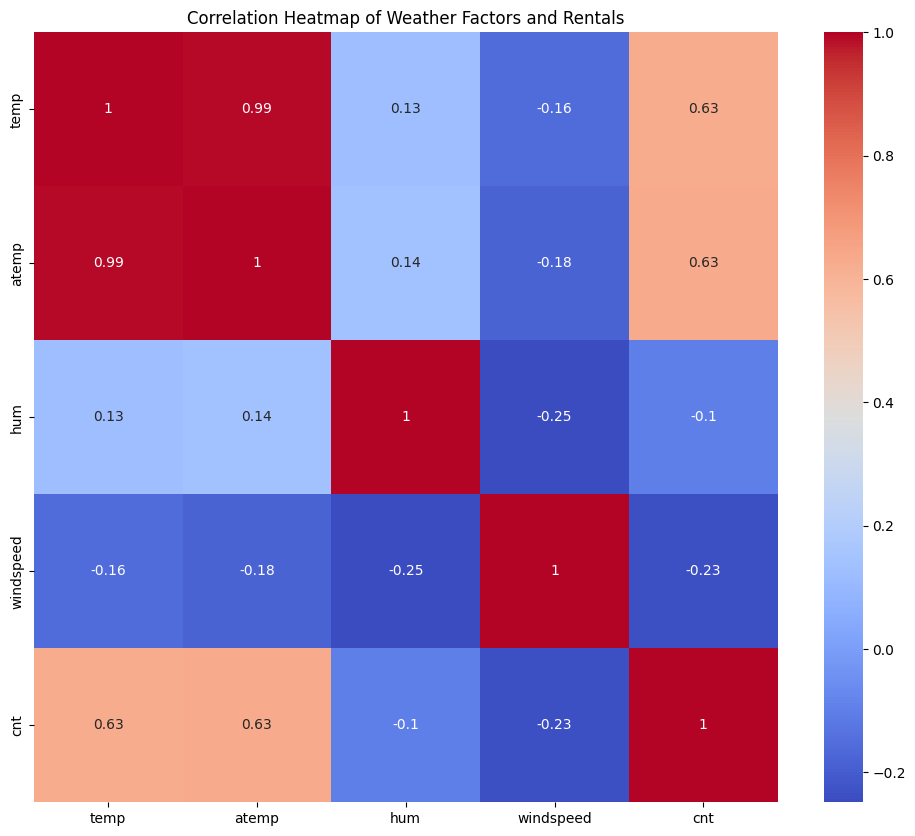

In [18]:
# Correlation heatmap of Wewather facfors and numbers of rentals
plt.figure(figsize=(12, 10))
sns.heatmap(day[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Weather Factors and Rentals')
plt.show()

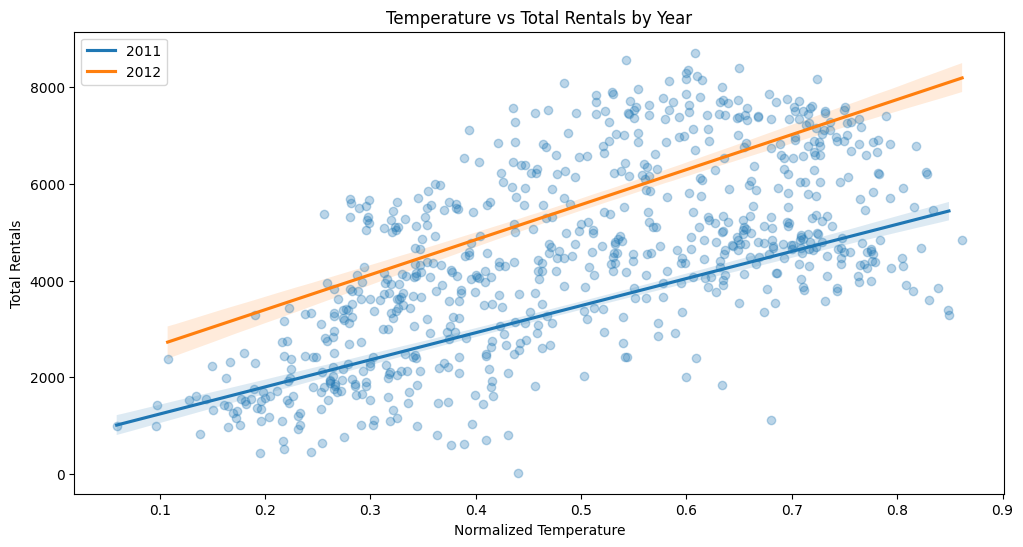

In [19]:
# Line plot of average rentals by temperature, separated by year
plt.figure(figsize=(12, 6))
for year in [2011, 2012]:
    year_data = day[day['year'] == year]
    sns.regplot(x='temp', y='cnt', data=year_data, scatter=False, label=str(year))
plt.scatter(day['temp'], day['cnt'], alpha=0.3)
plt.title('Temperature vs Total Rentals by Year')
plt.xlabel('Normalized Temperature')
plt.ylabel('Total Rentals')
plt.legend()
plt.show()

In [20]:
# Calculate and print the average rentals for each year
yearly_avg = day.groupby('year')['cnt'].mean()
print("Average daily rentals by year:")
print(yearly_avg)
print("\nPercentage increase from 2011 to 2012:")
print(f"{(yearly_avg[2012] - yearly_avg[2011]) / yearly_avg[2011] * 100:.2f}%")

Average daily rentals by year:
year
2011    3405.761644
2012    5599.934426
Name: cnt, dtype: float64

Percentage increase from 2011 to 2012:
64.43%


### Question 2: How do bike usage patterns differ between casual and registered users, and how does this change on holidays compared to working days?


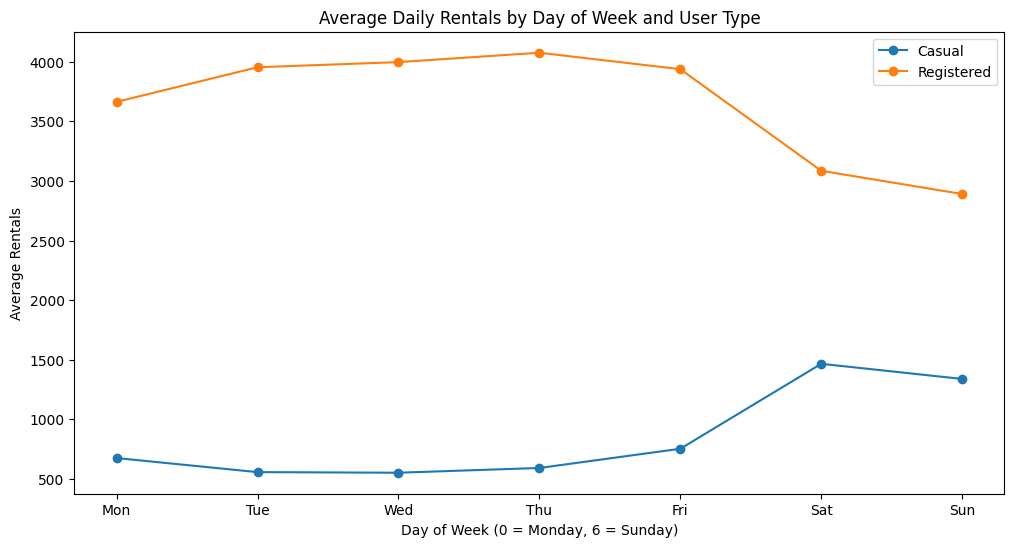

In [21]:
# Line plot of average rentals by day of week, separated by user type
day['dayofweek'] = day['dteday'].dt.dayofweek
weekly_pattern = day.groupby('dayofweek')[['casual', 'registered']].mean()
weekly_pattern.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Average Daily Rentals by Day of Week and User Type')
plt.xlabel('Day of Week (0 = Monday, 6 = Sunday)')
plt.ylabel('Average Rentals')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend(['Casual', 'Registered'])
plt.show()

In [22]:
# Ratio of casual vs registered users in holidays and working days
day['casual_ratio'] = day['casual'] / day['registered']
holiday_ratio = day.groupby('holiday')['casual_ratio'].mean()
print("Ratio of casual vs registered users:")
print(holiday_ratio)
print("\nPercentage difference in ratio on holidays vs working days:")
print(f"{(holiday_ratio[1] - holiday_ratio[0]) / holiday_ratio[0] * 100:.2f}%")

Ratio of casual vs registered users:
holiday
0    0.232270
1    0.415016
Name: casual_ratio, dtype: float64

Percentage difference in ratio on holidays vs working days:
78.68%


### Clustering

In [23]:
# Cluster analysis
features = ['temp', 'hum', 'windspeed', 'cnt']
X = day[features]
kmeans = KMeans(n_clusters=3, random_state=42)
day['Cluster'] = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


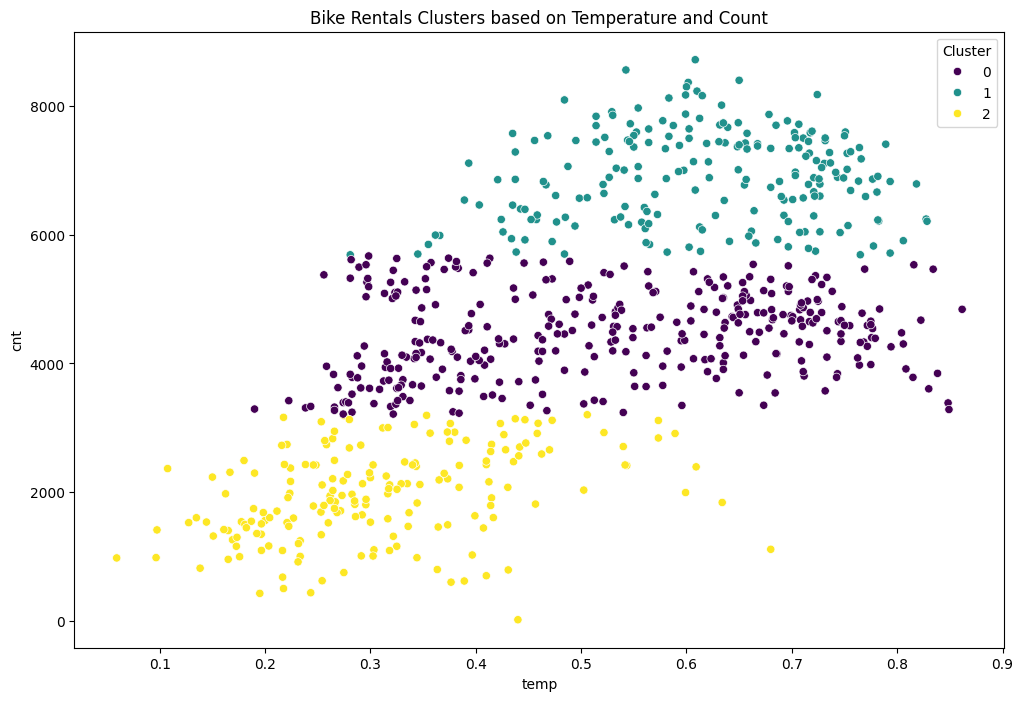

In [24]:
# Visualize clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=day, x='temp', y='cnt', hue='Cluster', palette='viridis')
plt.title('Bike Rentals Clusters based on Temperature and Count')
plt.show()

### RFV Analysis

I use RFV analysis instead of RFM because there is no actual monetary data in the bike rental dataset. It does offer the number of bikes that have been rented to the customers and this is perhaps more reflective of the number of transactions of bikes rather than actual revenues. RFV (Recency, Frequency, Volume) is more appropriate for this scenario as it focuses on:RFV (Recency, Frequency, Volume) is more appropriate for this scenario as it focuses on:
* Recency: The time each of the bikes was rented in each season and year of the year.
* Frequency: Frequency of rentals, this is whether rentals are frequent, this shows how demanded or popular the product is.
* Volume: The number of bikes rented on an average by people which depicts the level os usage or the size of usage.

This method enables the company to understad the patterns of renting and the use of services while avoiding presumptions on the issue of pricing and revenue. It’s most appropriate in business with usage rate as the measure of service consumption such as the bike-sharing stations. RFV also helps to determine seasonal effect: high or low rental frequency over years, and thereby analyze rental dynamics which is highly important for proper allocation of bikes and their maintenance.

In [25]:
# Function for RFV analysis
def rfv_analysis(df):
    current_date = df['dteday'].max()
    rfv = df.groupby(['yr', 'season']).agg({
        'dteday': lambda x: (current_date - x.max()).days,
        'workingday': 'count',
        'cnt': 'sum'
    })
    rfv.columns = ['Recency', 'Frequency', 'Volume']
    rfv['R_Score'] = pd.qcut(rfv['Recency'], q=4, labels=[4, 3, 2, 1])
    rfv['F_Score'] = pd.qcut(rfv['Frequency'], q=4, labels=[1, 2, 3, 4])
    rfv['V_Score'] = pd.qcut(rfv['Volume'], q=4, labels=[1, 2, 3, 4])
    rfv['RFV_Score'] = rfv['R_Score'].astype(str) + rfv['F_Score'].astype(str) + rfv['V_Score'].astype(str)
    return rfv

# Perform RFV analysis
rfv_result = rfv_analysis(day)

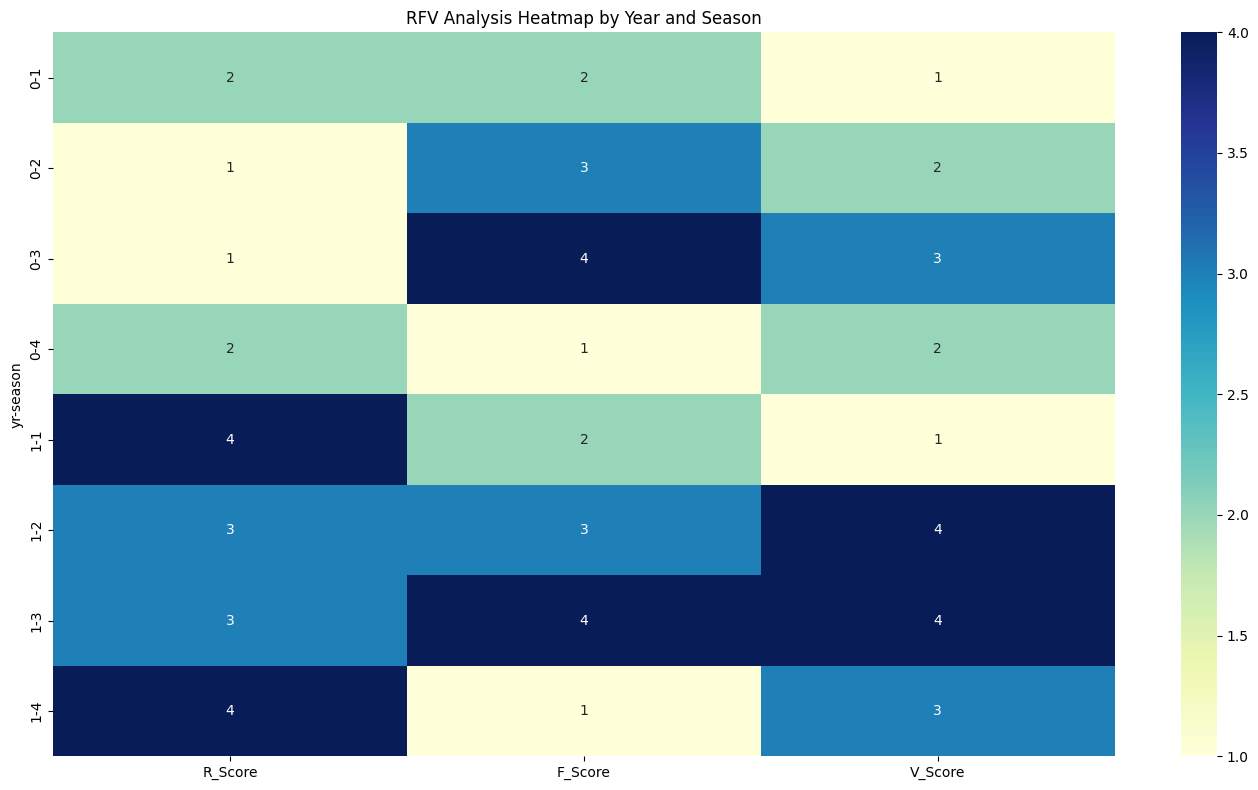

In [26]:
# Visualize RFV results
plt.figure(figsize=(14, 8))
sns.heatmap(rfv_result[['R_Score', 'F_Score', 'V_Score']],
            annot=True, cmap='YlGnBu', fmt='g')
plt.title('RFV Analysis Heatmap by Year and Season')
plt.tight_layout()
plt.show()

In [27]:
weather_mapping = {
    1: 'Clear, Few clouds, Partly cloudy, Partly cloudy',
    2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
    3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
    4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
}
day['weathersit'] = day['weathersit'].replace(weather_mapping)

In [28]:
print(day['weathersit'].unique())

['Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist'
 'Clear, Few clouds, Partly cloudy, Partly cloudy'
 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds']


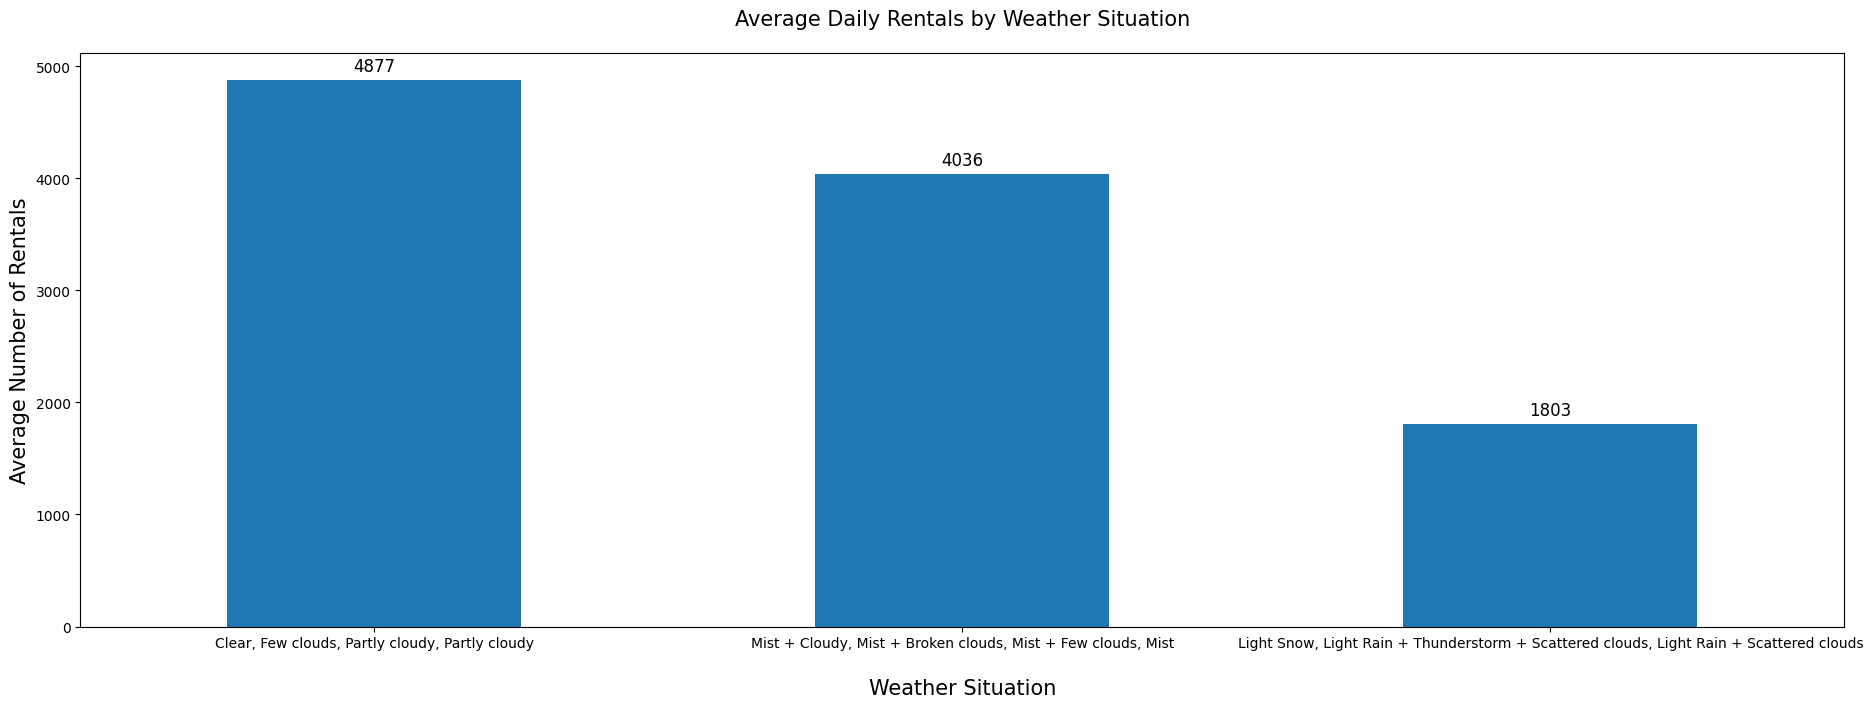

In [38]:
# Additional analysis: Average rentals by weather situation
weather_analysis = day.groupby('weathersit')['cnt'].mean().sort_values(ascending=False)
plt.figure(figsize=(20, 8))
ax = weather_analysis.plot(kind='bar') # Assign the Axes object returned by plot to ax
plt.title('Average Daily Rentals by Weather Situation', fontsize=15, pad=20)
plt.xlabel('Weather Situation', labelpad=20, fontsize=15)
plt.ylabel('Average Number of Rentals', fontsize = 15)
plt.xticks(rotation=0)
plt.tight_layout(pad=4.0)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=12, color='black')

plt.show()

In [30]:
day.to_csv('main_data.csv', index=False)

## Conclusion

### Conclusion for question 1:
Based on the analysis of weather factors and seasonal effects on daily bike rentals in 2011 and 2012, we can conclude:

1. There is a strong positive correlation between temperature (temp and atemp) and the number of bike rentals. As temperature increases, more bikes are rented.
2. Humidity (hum) has a weak negative correlation with rentals, while wind speed (windspeed) has a very weak negative correlation.
3. Seasons significantly influence rental numbers, with summer and fall showing the highest rental numbers, followed by spring, and winter with the lowest rental numbers.
4. There is a significant increase in the average daily bike rentals from 2011 to 2012, with a percentage increase of 64.43%.
5. The pattern of temperature influence on rental numbers is relatively consistent between 2011 and 2012, but with higher volumes in 2012.


### Conclusion for question 2:
Regarding the differences in usage patterns between casual and registered users, and how this changes on holidays compared to working days, we can conclude:

1. Registered users show a more stable usage pattern throughout the week, with peak usage on weekdays (Monday-Friday).
2. Casual users have a different usage pattern, with peak usage on weekends (Saturday-Sunday).
3. The ratio of casual to registered users increases significantly on holidays, with an increase of 78.68% compared to working days.
4. On holidays, there is an increase in rentals from both types of users, but the increase for casual users is proportionally higher.
5. The monthly pattern shows that casual users have greater variation throughout the year, with peaks in the summer months, while registered users show a more consistent pattern.

Based on these findings, there are several strategies that can be implemented for further performance enhancement, including:
1. Increasing bike availability on peak days and seasons, especially during clear weather and warm temperatures.
2. Creating promotional events or offers to increase usage during periods in low demand, such as winter or days with poor weather.
3. Developing different marketing strategies for casual and registered users, focusing on converting casual users to registered users, especially those who frequently use the service on weekends and holidays.
4. Considering price adjustments or attractive subscription packages to encourage more consistent usage throughout the year, especially for casual users.